In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from scipy import stats as sps
from scipy.interpolate import interp1d

from IPython.display import clear_output

%config InlineBackend.figure_format = 'retina'

In [40]:
import cufflinks as cf

In [ ]:
#help(df.iplot)

In [125]:
%reload_ext autoreload
%autoreload 2

In [139]:
cf.get_config_file()

{'sharing': 'private',
 'theme': 'white',
 'colorscale': 'dflt',
 'offline': True,
 'offline_connected': True,
 'offline_url': '',
 'offline_show_link': True,
 'offline_link_text': ' ',
 'datagen_mode': 'stocks',
 'dimensions': None,
 'margin': None,
 'offline_config': None}

In [12]:
cf.set_config_file(offline=True)

In [138]:
cf.set_config_file(offline_link_text=' ')

In [130]:
cf.set_config_file(theme='white')

In [4]:
#from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
#import plotly.graph_objects as go
#init_notebook_mode(connected=True)

In [5]:
k = np.array([20, 40, 55, 90])

# We create an array for every possible value of Rt
R_T_MAX = 12
r_t_range = np.linspace(0, R_T_MAX, R_T_MAX*100+1)

# Gamma is 1/serial interval
# https://wwwnc.cdc.gov/eid/article/26/7/20-0282_article
# https://www.nejm.org/doi/full/10.1056/NEJMoa2001316
GAMMA = 1/7

In [6]:
def highest_density_interval(pmf, p=.9, debug=False):
    # If we pass a DataFrame, just call this recursively on the columns
    if(isinstance(pmf, pd.DataFrame)):
        return pd.DataFrame([highest_density_interval(pmf[col], p=p) for col in pmf],
                            index=pmf.columns)
    
    cumsum = np.cumsum(pmf.values)
    
    # N x N matrix of total probability mass for each low, high
    total_p = cumsum - cumsum[:, None]
    
    # Return all indices with total_p > p
    lows, highs = (total_p > p).nonzero()
    
    # Find the smallest range (highest density)
    best = (highs - lows).argmin()
    
    low = pmf.index[lows[best]]
    high = pmf.index[highs[best]]
    
    return pd.Series([low, high],
                     index=[f'Low_{p*100:.0f}',
                            f'High_{p*100:.0f}'])

In [7]:
state_key = {
'EC':'Eastern Cape',
'FS':'Free State',
'GP':'Gauteng',
'KZN':'Kwazulu Natal',
'LP':'Limpopo',
'MP':'Mpumalanga',
'NC':'Northern Cape',
'NW':'North-West',
'WC':'Western Cape'
}
state_filter = list(state_key.keys())

In [144]:
url = 'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_confirmed.csv'
states = pd.read_csv(url,
                     parse_dates=['date'], dayfirst=True,
                     squeeze=True,index_col=0).sort_index()

state_name = 'total'

states.tail()

,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
date,,,,,,,,,,,,,
2020-05-17,20200517,1936.0,158.0,2329.0,1543.0,77.0,71.0,37.0,70.0,9294.0,0.0,15515,https://sacoronavirus.co.za/2020/05/17/update-...
2020-05-18,20200518,2052.0,163.0,2343.0,1567.0,88.0,76.0,37.0,72.0,10035.0,0.0,16433,https://twitter.com/nicd_sa/status/12624762674...
2020-05-19,20200519,2135.0,168.0,2361.0,1616.0,94.0,78.0,37.0,72.0,10639.0,0.0,17200,https://sacoronavirus.co.za/2020/05/19/update-...
2020-05-20,20200520,2215.0,180.0,2400.0,1650.0,93.0,93.0,38.0,72.0,11262.0,0.0,18003,https://twitter.com/nicd_sa/status/12631829345...
2020-05-21,20200521,2324.0,184.0,2453.0,1693.0,121.0,95.0,37.0,77.0,12153.0,0.0,19137,https://twitter.com/nicd_sa/status/12634660168...


In [9]:
#state_filter.insert(0,'date')
#state_filter.append('total')
#state_filter

In [10]:
state_plot = states[state_filter]

In [52]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [108]:
# https://nbviewer.jupyter.org/gist/santosjorge/00ca17b121fa2463e18b
# paired
# rdylbu
# spectral
# set1-3
# dark2
# dflt -> white
colorscale=cf.colors.get_scales('paired')
cf.colors.color_table(colorscale)

In [140]:
state_plot.iplot(kind='bar', barmode='stack', title='Total Cases per Province', xTitle='Dates', yTitle='Cases', colors=colorscale)

In [141]:
state_plot.iplot(kind='bar', barmode='stack', theme='ggplot')

In [53]:
state_plot.iplot(kind='bar', barmode='stack', theme='pearl')

In [54]:
state_plot.iplot(kind='bar', barmode='stack', theme='solar')

In [55]:
state_plot.iplot(kind='bar', barmode='stack', theme='space')

In [57]:
state_plot.iplot(kind='bar', barmode='stack', theme='polar')

In [58]:
state_plot.iplot(kind='bar', barmode='stack', theme='henanigans')

In [111]:
states['total'].diff().iplot(kind='bar', title='Daily Cases per Province', xTitle='Dates', yTitle='Cases', colors=colorscale)

In [112]:
states['WC'].diff().iplot(kind='bar', title='Daily Cases in Western Cape', xTitle='Dates', yTitle='Cases', colors=colorscale)

In [16]:
url = 'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_deaths.csv'
states_all_deaths = pd.read_csv(url,
                     parse_dates=['date'], dayfirst=True,
                     squeeze=True,index_col=0).sort_index()
states_all_deaths.tail()

,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
date,,,,,,,,,,,,,
2020-05-17,20200517,35,6,25,45,3,0,0,1,149,0,264,https://twitter.com/nicd_sa/status/12621103891...
2020-05-18,20200518,39,6,26,45,3,0,0,1,166,0,286,https://twitter.com/nicd_sa/status/12624762674...
2020-05-19,20200519,41,6,27,46,3,0,1,1,187,0,312,https://twitter.com/nicd_sa/status/12628278415...
2020-05-20,20200520,45,6,27,46,3,0,1,1,210,0,339,https://twitter.com/nicd_sa/status/12631829345...
2020-05-21,20200521,50,6,27,46,3,0,1,1,235,0,369,https://twitter.com/nicd_sa/status/12634660168...


In [17]:
state_deaths = states_all_deaths[state_filter]
state_deaths.tail()

,EC,FS,GP,KZN,LP,MP,NC,NW,WC
date,,,,,,,,,
2020-05-17,35,6,25,45,3,0,0,1,149
2020-05-18,39,6,26,45,3,0,0,1,166
2020-05-19,41,6,27,46,3,0,1,1,187
2020-05-20,45,6,27,46,3,0,1,1,210
2020-05-21,50,6,27,46,3,0,1,1,235


In [63]:
state_deaths.iplot(kind='bar', barmode='stack')

In [19]:
url = 'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_recoveries.csv'
states_all_recover = pd.read_csv(url,
                     parse_dates=['date'], dayfirst=True,
                     squeeze=True,index_col=0).sort_index()
states_all_recover.tail()

,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
date,,,,,,,,,,,,,
2020-05-17,20200517,839,108,1583,817,37,49,24,28,3521,0,7006,https://twitter.com/nicd_sa/status/12621103891...
2020-05-18,20200518,839,108,1657,818,37,53,27,28,3731,0,7298,https://twitter.com/nicd_sa/status/12624762674...
2020-05-19,20200519,839,118,1671,818,39,57,27,28,4363,0,7960,https://twitter.com/nicd_sa/status/12628278415...
2020-05-20,20200520,1036,118,1694,842,42,58,27,28,5105,0,8950,https://twitter.com/nicd_sa/status/12631829345...
2020-05-21,20200521,1036,118,1694,842,42,58,27,28,5105,0,8950,https://twitter.com/nicd_sa/status/12634660168...


In [20]:
states_recover = states_all_recover[state_filter]
states_recover.tail()

,EC,FS,GP,KZN,LP,MP,NC,NW,WC
date,,,,,,,,,
2020-05-17,839,108,1583,817,37,49,24,28,3521
2020-05-18,839,108,1657,818,37,53,27,28,3731
2020-05-19,839,118,1671,818,39,57,27,28,4363
2020-05-20,1036,118,1694,842,42,58,27,28,5105
2020-05-21,1036,118,1694,842,42,58,27,28,5105


In [124]:
states_recover.iplot(kind='bar', barmode='stack')

In [22]:
states_series = pd.Series(states['total'].values, index=states.index.values, name='Cases')
states_series

2020-03-05        1
2020-03-07        2
2020-03-08        3
2020-03-09        7
2020-03-11       13
              ...  
2020-05-17    15515
2020-05-18    16433
2020-05-19    17200
2020-05-20    18003
2020-05-21    19137
Name: Cases, Length: 76, dtype: int64

In [23]:
deaths_series = pd.Series(states_all_deaths['total'].values, index=states_all_deaths.index, name='Deaths')
recover_series = pd.Series(states_all_recover['total'].values, index=states_all_recover.index, name='Recovered')

In [24]:
states_combine = pd.concat([states_series, recover_series, deaths_series], axis=1)
states_combine

,Cases,Recovered,Deaths
2020-03-05,1,NaN,NaN
2020-03-07,2,NaN,NaN
2020-03-08,3,NaN,NaN
2020-03-09,7,NaN,NaN
2020-03-11,13,NaN,NaN
...,...,...,...
2020-05-17,15515,7006.0,264.0
2020-05-18,16433,7298.0,286.0
2020-05-19,17200,7960.0,312.0
2020-05-20,18003,8950.0,339.0


In [25]:
states_master = states_combine.ffill(axis=0)

In [121]:
states_master.iplot()

In [117]:
states_changed = states_master[['Recovered','Deaths']].sum(axis=1)

In [118]:
active_all = states_master['Cases'].sub(states_changed)
active_all

2020-03-05       1.0
2020-03-07       2.0
2020-03-08       3.0
2020-03-09       7.0
2020-03-11      13.0
               ...  
2020-05-17    8245.0
2020-05-18    8849.0
2020-05-19    8928.0
2020-05-20    8714.0
2020-05-21    9818.0
Length: 76, dtype: float64

In [119]:
states_master['Active'] = active_all

In [122]:
states_master.iplot(title='Combined Stats', xTitle='Dates', yTitle='Cases')

In [39]:
url = 'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_testing.csv'
states_all_tests = pd.read_csv(url,
                     parse_dates=['date'], dayfirst=True,
                     squeeze=True,index_col=0).sort_index()
states_all_tests

,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
date,,,,,,,,,,,,,
2020-04-27,20200427,14054,6317,61830,28265,3691,4385,1314,2544,33335,12908,168643,ministerial briefing 26-04-2020
2020-05-03,20200503,24835,12634,85134,45955,5626,6691,1951,3565,53967,17183,257541,https://www.nicd.ac.za/wp-content/uploads/2020...
2020-05-09,20200905,34032,17231,111630,61801,7783,9823,3092,5213,70038,20693,341336,https://www.nicd.ac.za/wp-content/uploads/2020...
2020-05-13,20200513,38122,19265,127030,67853,8239,11414,3683,5812,82865,22069,386352,https://twitter.com/bandilemasuku/status/12609...


In [32]:
states_tests = states_all_tests[state_filter]

In [33]:
states_tests.iplot(kind='bar', barmode='stack')

In [154]:
url = 'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_confirmed.csv'
states = pd.read_csv(url,
                     parse_dates=['date'], dayfirst=True,
                     squeeze=True).sort_index()

state_name = 'total'

states

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
0,2020-03-05,20200305,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,2020-03-07,20200307,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,NaN
2,2020-03-08,20200308,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3,so
3,2020-03-09,20200309,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN
4,2020-03-11,20200311,0.0,0.0,5.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2020-05-17,20200517,1936.0,158.0,2329.0,1543.0,77.0,71.0,37.0,70.0,9294.0,0.0,15515,https://sacoronavirus.co.za/2020/05/17/update-...
72,2020-05-18,20200518,2052.0,163.0,2343.0,1567.0,88.0,76.0,37.0,72.0,10035.0,0.0,16433,https://twitter.com/nicd_sa/status/12624762674...
73,2020-05-19,20200519,2135.0,168.0,2361.0,1616.0,94.0,78.0,37.0,72.0,10639.0,0.0,17200,https://sacoronavirus.co.za/2020/05/19/update-...
74,2020-05-20,20200520,2215.0,180.0,2400.0,1650.0,93.0,93.0,38.0,72.0,11262.0,0.0,18003,https://twitter.com/nicd_sa/status/12631829345...


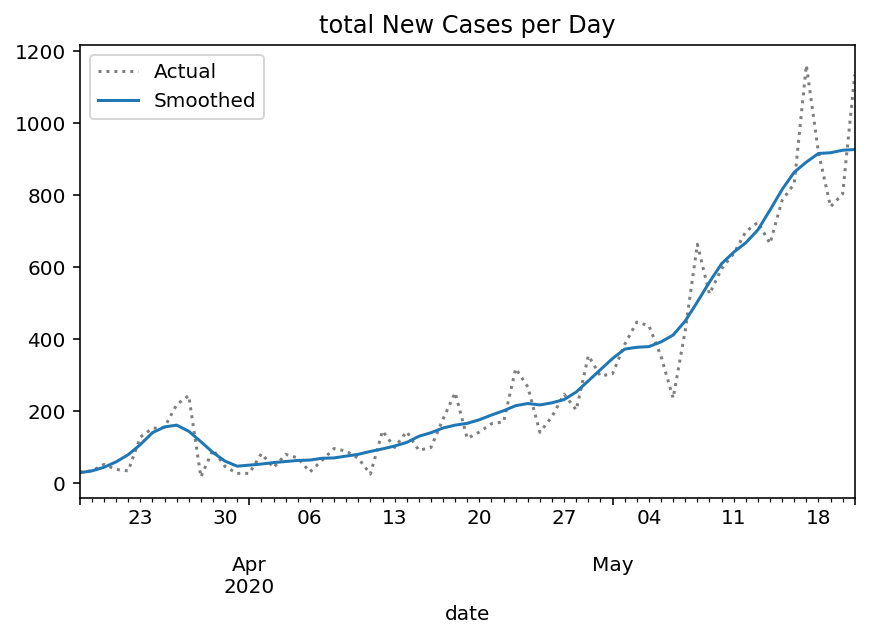

In [157]:
def prepare_cases(cases, cutoff=25):
    new_cases = cases.diff()

    smoothed = new_cases.rolling(7,
        win_type='gaussian',
        min_periods=1,
        center=True).mean(std=2).round()
    
    idx_start = np.searchsorted(smoothed, cutoff)
    
    smoothed = smoothed.iloc[idx_start:]
    original = new_cases.loc[smoothed.index]
    
    return original, smoothed

cases = pd.Series(states[state_name].values, index=states['date'])

original, smoothed = prepare_cases(cases, cutoff=25)

original.plot(title=f"{state_name} New Cases per Day",
               c='k',
               linestyle=':',
               alpha=.5,
               label='Actual',
               legend=True,
             figsize=(500/72, 300/72))

ax = smoothed.plot(label='Smoothed',
                   legend=True)

ax.get_figure().set_facecolor('w')

In [158]:
single_cases_df = pd.concat([original,smoothed], axis=1)
single_cases_df = single_cases_df.rename(columns={0:'Actual'})
single_cases_df = single_cases_df.rename(columns={1:'Smoothed'})

Layout = {'plot_bgcolor':'#fff',
          'xaxis':{
              'color':'#000',
              'title':{
                      'font':{
                          'color':'#000'
                      }
              }
          }
         }
fig = single_cases_df.iplot(asFigure = True, xTitle = 'Date', yTitle = 'Daily change in confirmed cases', title = f"{state_name} New Cases per Day", layout=Layout)
fig.show()

In [159]:
def get_posteriors(sr, sigma=0.15):

    # (1) Calculate Lambda
    lam = sr[:-1].values * np.exp(GAMMA * (r_t_range[:, None] - 1))

    
    # (2) Calculate each day's likelihood
    likelihoods = pd.DataFrame(
        data = sps.poisson.pmf(sr[1:].values, lam),
        index = r_t_range,
        columns = sr.index[1:])
    
    # (3) Create the Gaussian Matrix
    process_matrix = sps.norm(loc=r_t_range,
                              scale=sigma
                             ).pdf(r_t_range[:, None]) 

    # (3a) Normalize all rows to sum to 1
    process_matrix /= process_matrix.sum(axis=0)
    
    # (4) Calculate the initial prior
    #prior0 = sps.gamma(a=4).pdf(r_t_range)
    prior0 = np.ones_like(r_t_range)/len(r_t_range)
    prior0 /= prior0.sum()

    # Create a DataFrame that will hold our posteriors for each day
    # Insert our prior as the first posterior.
    posteriors = pd.DataFrame(
        index=r_t_range,
        columns=sr.index,
        data={sr.index[0]: prior0}
    )
    
    # We said we'd keep track of the sum of the log of the probability
    # of the data for maximum likelihood calculation.
    log_likelihood = 0.0

    # (5) Iteratively apply Bayes' rule
    for previous_day, current_day in zip(sr.index[:-1], sr.index[1:]):

        #(5a) Calculate the new prior
        current_prior = process_matrix @ posteriors[previous_day]
        
        #(5b) Calculate the numerator of Bayes' Rule: P(k|R_t)P(R_t)
        numerator = likelihoods[current_day] * current_prior
        
        #(5c) Calcluate the denominator of Bayes' Rule P(k)
        denominator = np.sum(numerator)
        
        # Execute full Bayes' Rule
        posteriors[current_day] = numerator/denominator
        
        # Add to the running sum of log likelihoods
        log_likelihood += np.log(denominator)
    
    return posteriors, log_likelihood

# Note that we're fixing sigma to a value just for the example
posteriors, log_likelihood = get_posteriors(smoothed, sigma=.25)

In [160]:
# Note that this takes a while to execute - it's not the most efficient algorithm
hdis = highest_density_interval(posteriors, p=.9)

most_likely = posteriors.idxmax().rename('ML')

# Look into why you shift -1
result = pd.concat([most_likely, hdis], axis=1)

# US: Since we now use a uniform prior, the first datapoint is pretty bogus, so just truncating it here
# ZA: rename to single_result to add to final province plots again
single_result = result.drop(result.index[0])
single_result.tail()

,ML,Low_90,High_90
date,,,
2020-05-17,1.30,0.97,1.59
2020-05-18,1.23,0.88,1.50
2020-05-19,1.09,0.77,1.38
2020-05-20,1.07,0.75,1.36
2020-05-21,1.03,0.71,1.32


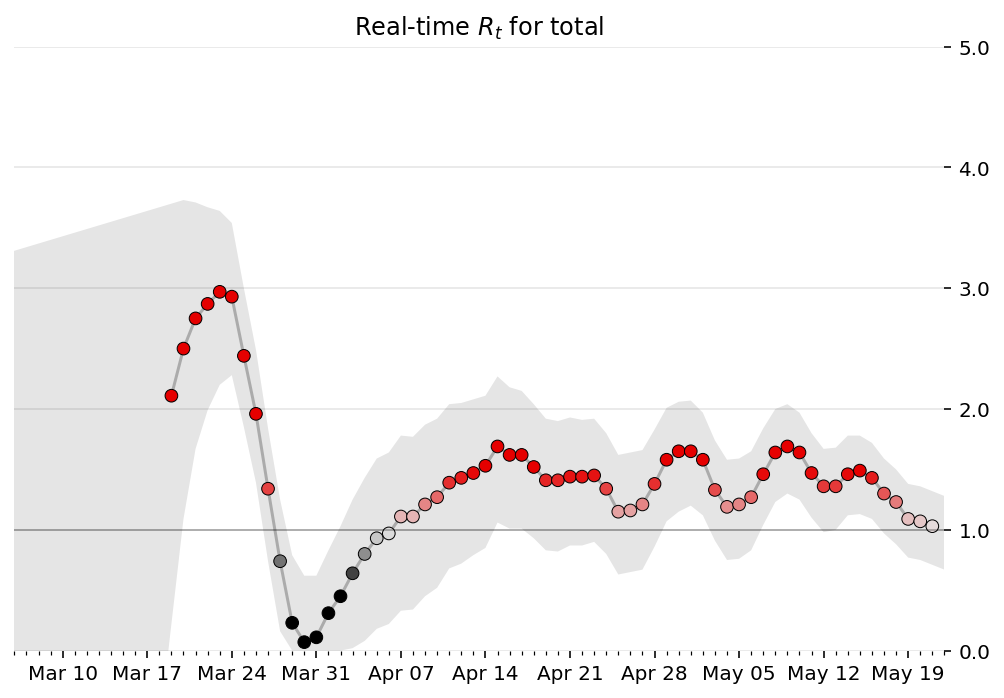

In [161]:
def plot_rt(result, ax, state_name):
    
    ax.set_title(f"{state_name}")
    
    # Colors
    ABOVE = [1,0,0]
    MIDDLE = [1,1,1]
    BELOW = [0,0,0]
    cmap = ListedColormap(np.r_[
        np.linspace(BELOW,MIDDLE,25),
        np.linspace(MIDDLE,ABOVE,25)
    ])
    color_mapped = lambda y: np.clip(y, .5, 1.5)-.5
    
    index = result['ML'].index.get_level_values('date')
    values = result['ML'].values
    
    # Plot dots and line
    ax.plot(index, values, c='k', zorder=1, alpha=.25)
    ax.scatter(index,
               values,
               s=40,
               lw=.5,
               c=cmap(color_mapped(values)),
               edgecolors='k', zorder=2)
    
    # Aesthetically, extrapolate credible interval by 1 day either side
    lowfn = interp1d(date2num(index),
                     result['Low_90'].values,
                     bounds_error=False,
                     fill_value='extrapolate')
    
    highfn = interp1d(date2num(index),
                      result['High_90'].values,
                      bounds_error=False,
                      fill_value='extrapolate')
    
    extended = pd.date_range(start=pd.Timestamp('2020-03-01'),
                             end=index[-1]+pd.Timedelta(days=1))
    
    ax.fill_between(extended,
                    lowfn(date2num(extended)),
                    highfn(date2num(extended)),
                    color='k',
                    alpha=.1,
                    lw=0,
                    zorder=3)

    ax.axhline(1.0, c='k', lw=1, label='$R_t=1.0$', alpha=.25);
    
    # Formatting
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
    ax.yaxis.tick_right()
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.margins(0)
    ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)
    ax.margins(0)
    ax.set_ylim(0.0, 5.0)
    ax.set_xlim(pd.Timestamp('2020-03-06'), result.index.get_level_values('date')[-1]+pd.Timedelta(days=1))
    #fig.set_facecolor('w')
    
    return ax

    
fig, ax = plt.subplots(figsize=(600/72,400/72))

plot_rt(single_result, ax, state_name)
ax.set_title(f'Real-time $R_t$ for {state_name}')
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [162]:
sigmas = np.linspace(1/20, 1, 20)

# ZA: only consider the official 9 provinces
states_to_process = list(states.columns.values[2:11])
# ZA: do not think the total RSA sigma needs to be included to find max later
# states_to_process.append('Total RSA') 

results = {}

for state_name in states_to_process:
    
    print(state_name)
    
    # --> ZA prepare data
    # ZA: Rt is very small for some provinces
    cases = pd.Series(states[state_name].values,index=states['date'])
    new, smoothed = prepare_cases(cases, cutoff=10)
    cut = 10
    
    # Rt for ZA is very small for some provinces
    # set threshold for smoothed data length at 3 to ensure posteriors can be calculated
    if len(smoothed) < 3:
        new, smoothed = prepare_cases(cases, cutoff=5)
        cut = 5
        if len(smoothed) < 3:
            new, smoothed = prepare_cases(cases, cutoff=2)
            cut = 2
            
            ## ignore Rt further for slow growth provinces
            if len(smoothed) < 3:
                print('BREAK')
                clear_output(wait=True)
                continue
            
    print(cut)
    ## <-- ZA prepare data
    
    result = {}
    
    # Holds all posteriors with every given value of sigma
    result['posteriors'] = []
    
    # Holds the log likelihood across all k for each value of sigma
    result['log_likelihoods'] = []
    
    for sigma in sigmas:
        posteriors, log_likelihood = get_posteriors(smoothed, sigma=sigma)
        result['posteriors'].append(posteriors)
        result['log_likelihoods'].append(log_likelihood)
    
    # Store all results keyed off of state name
    results[state_name] = result
    clear_output(wait=True)

print('Done.')

Done.


In [163]:
# Each index of this array holds the total of the log likelihoods for
# the corresponding index of the sigmas array.
total_log_likelihoods = np.zeros_like(sigmas)

# Loop through each state's results and add the log likelihoods to the running total.
for state_name, result in results.items():
    total_log_likelihoods += result['log_likelihoods']

# Select the index with the largest log likelihood total
max_likelihood_index = total_log_likelihoods.argmax()

# Select the value that has the highest log likelihood
sigma = sigmas[max_likelihood_index]


In [164]:
final_results = None

for state_name, result in results.items():
    print(state_name)
    posteriors = result['posteriors'][max_likelihood_index]
    hdis_90 = highest_density_interval(posteriors, p=.9)
    hdis_50 = highest_density_interval(posteriors, p=.5)
    most_likely = posteriors.idxmax().rename('ML')
    result = pd.concat([most_likely, hdis_90, hdis_50], axis=1)
    
    # ZA: add province index
    result.index = pd.MultiIndex.from_product([[state_name], result.index], names=['state','date'])
     
    if final_results is None:
        final_results = result
    else:
        final_results = pd.concat([final_results, result])
    clear_output(wait=True)

print('Done.')

Done.


In [165]:
# US: This can be moved before the plots
# Since we now use a uniform prior, the first datapoint is pretty bogus, so just truncating it here
final_results = final_results.groupby('state').apply(lambda x: x.iloc[1:].droplevel(0))

# Rt Data Import

In [166]:
#dsfsi
url = 'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/calc/calculated_rt_sa_provincial_cumulative.csv'
states_raw = pd.read_csv(url,
                     parse_dates=['date'], dayfirst=True,
                     squeeze=True, index_col=[0,1])

In [167]:
state_single = states_raw.filter(like='Total RSA', axis=0)
state_single.tail()

ML  High_90  Low_90
state     date                             
Total RSA 2020-05-17  1.30     1.59    0.97
          2020-05-18  1.23     1.50    0.88
          2020-05-19  1.09     1.38    0.77
          2020-05-20  1.07     1.36    0.75
          2020-05-21  1.03     1.32    0.71

In [187]:
last = state_single.groupby(level=0).last().iloc[0]['ML']
last

state
Total RSA    1.03
Name: ML, dtype: float64

In [169]:
latestdate = state_single.index.get_level_values('date')[-1]
latestdate.strftime("%d %B %Y")

'21 May 2020'

In [171]:
fig = state_single.iplot(asFigure = True)
fig.show()

In [194]:
states_raw.groupby('state').last()['ML']

state
EC           1.19
FS           1.47
GP           1.00
KZN          1.11
LP           1.64
MP           1.61
NW           0.74
Total RSA    1.03
WC           1.27
Name: ML, dtype: float64

In [173]:
len(states_raw.groupby('state'))

9

In [174]:
states_filter = states_raw.loc[['EC','FS','GP','KZN','LP','MP','NC','NW','WC']]

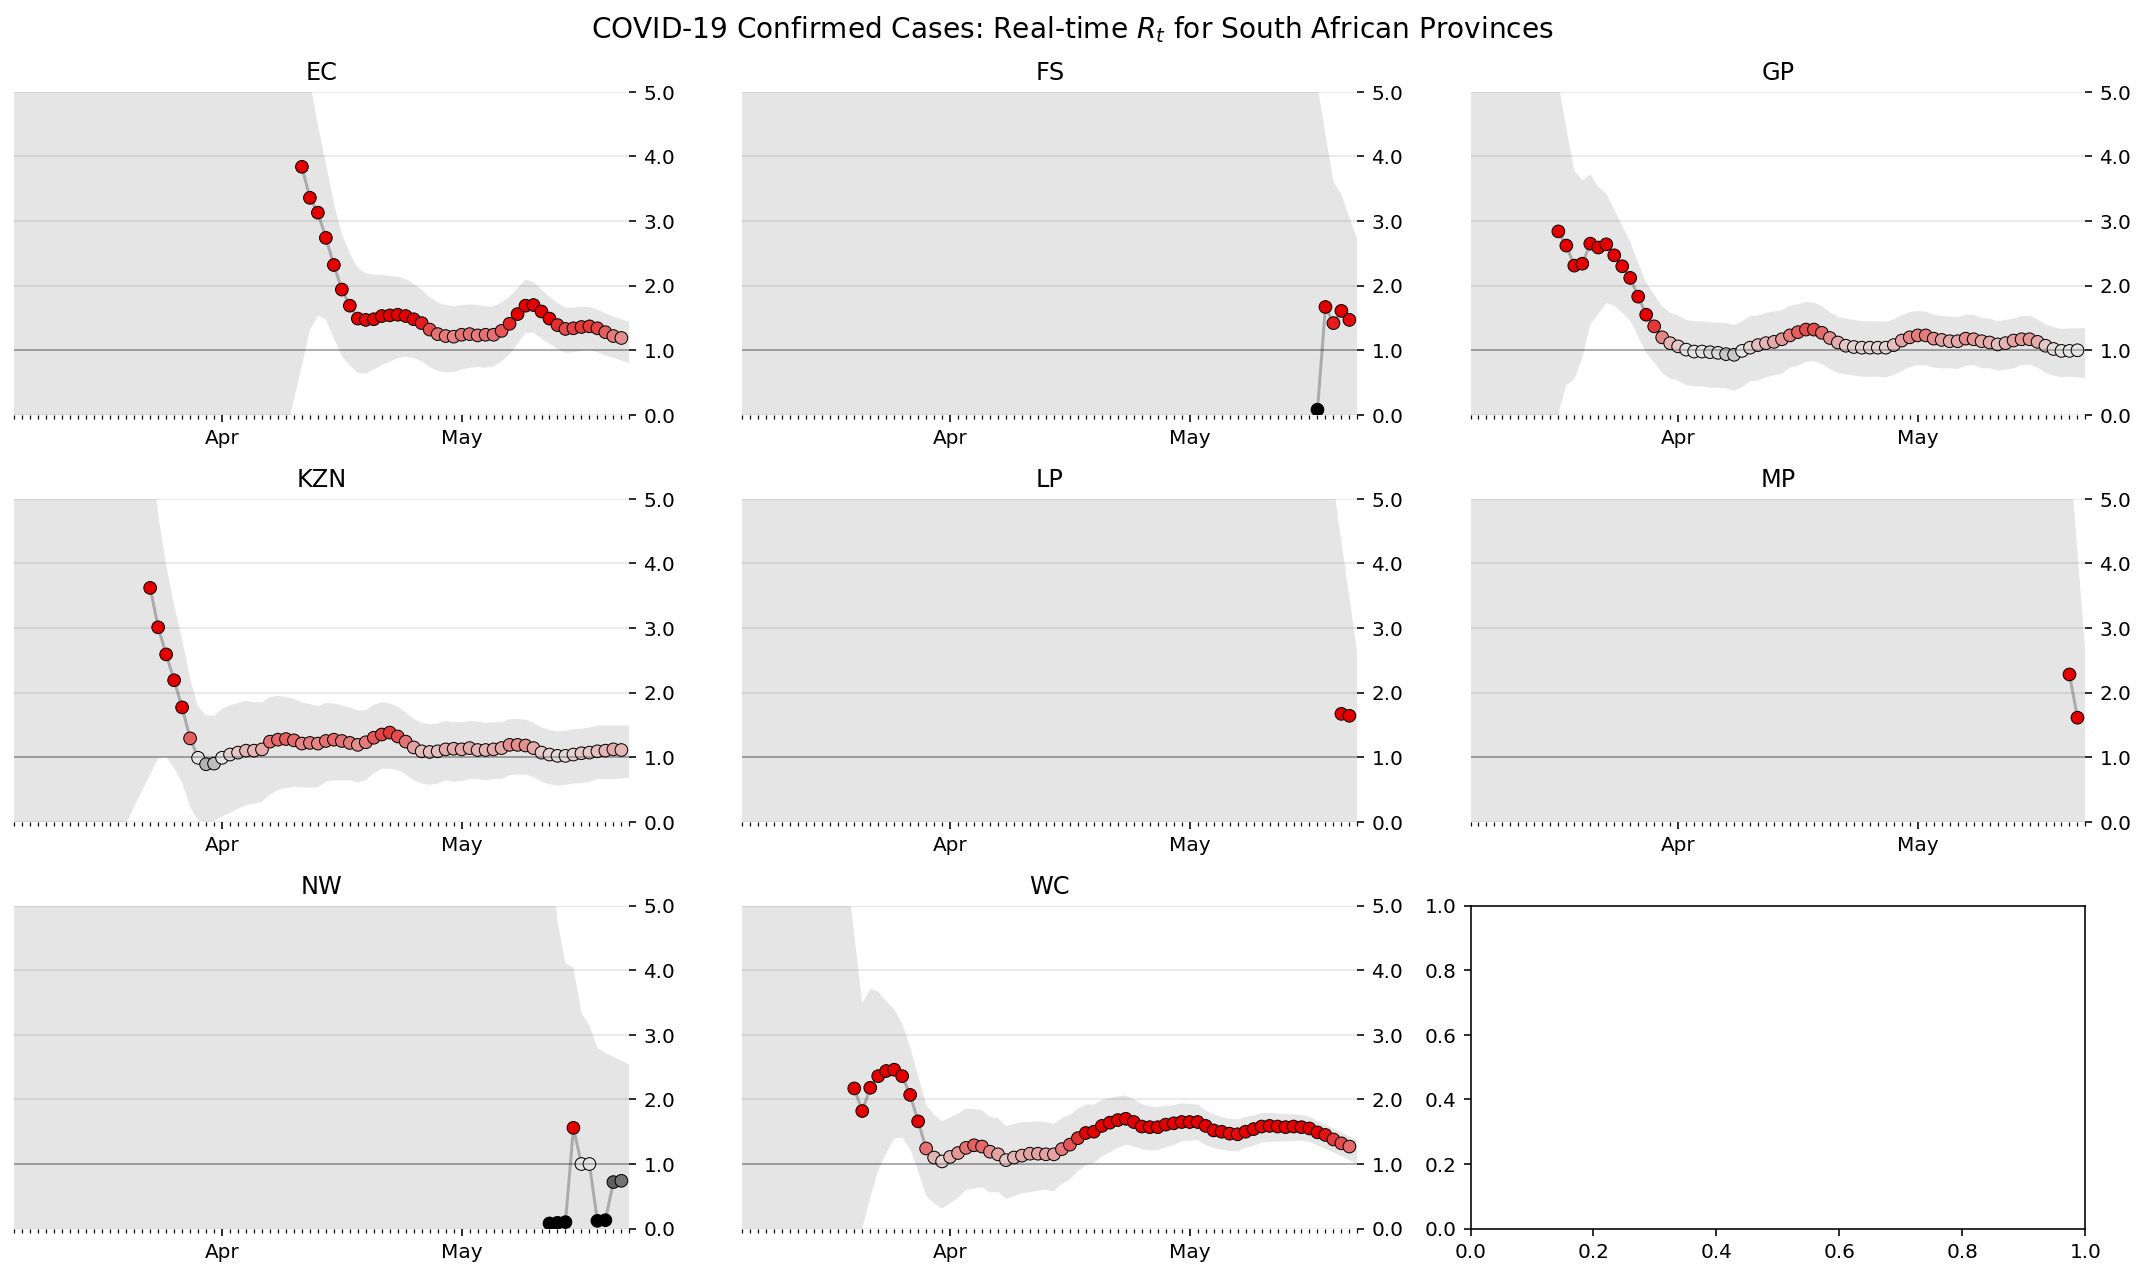

In [175]:
def all_plot(final_results):
    state_groups = final_results.groupby('state')
    
    ncols = 3
    nrows = int(np.ceil(len(state_groups) / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*3))

    for i, (state_name, result) in enumerate(state_groups):
        axes.flat[i] = plot_rt(result, axes.flat[i], state_name)

    fig.tight_layout()
    fig.set_facecolor('w')
    
    fig.suptitle(f'COVID-19 Confirmed Cases: Real-time $R_t$ for South African Provinces', size=14)
    fig.subplots_adjust(top=0.92)
    
all_plot(states_filter)

In [176]:
fig = states_raw.iplot(asFigure = True, subplots=(4,2), subplot_titles=True)
fig.show()

In [177]:
for i, (state_name, result) in enumerate(states_raw.groupby('state')):
    print(result.tail())

                    ML  High_90  Low_90
state date                             
EC    2020-05-17  1.37     1.67    1.00
      2020-05-18  1.34     1.63    0.97
      2020-05-19  1.28     1.57    0.92
      2020-05-20  1.22     1.52    0.88
      2020-05-21  1.19     1.48    0.84
                    ML  High_90  Low_90
state date                             
FS    2020-05-17  0.08     5.10     0.0
      2020-05-18  1.67     4.34     0.0
      2020-05-19  1.42     3.61     0.0
      2020-05-20  1.61     3.41     0.0
      2020-05-21  1.47     3.06     0.0
                    ML  High_90  Low_90
state date                             
GP    2020-05-17  1.07     1.40    0.65
      2020-05-18  1.02     1.36    0.61
      2020-05-19  0.99     1.33    0.58
      2020-05-20  0.99     1.34    0.59
      2020-05-21  1.00     1.34    0.58
                    ML  High_90  Low_90
state date                             
KZN   2020-05-17  1.07     1.46    0.62
      2020-05-18  1.09     1.49    0.66


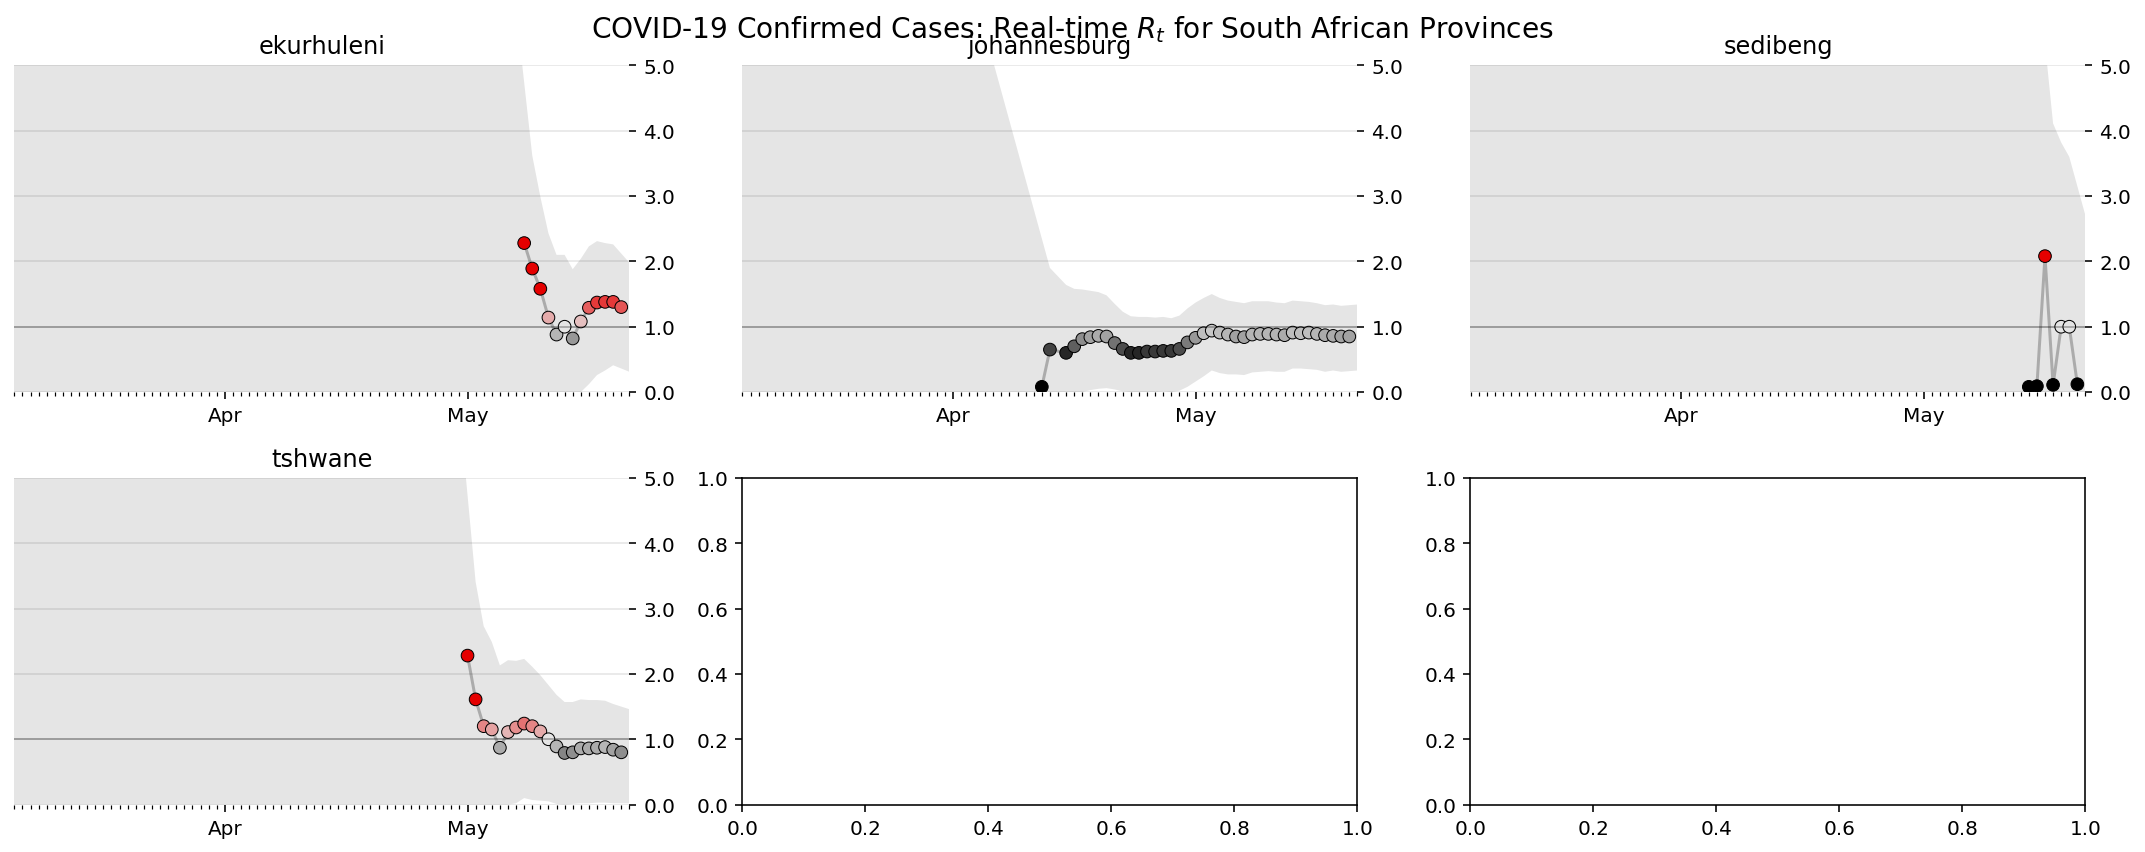

In [178]:
state = 'gp'
url = 'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/calc/calculated_rt_' + state + '_district_cumulative.csv'
districts_raw = pd.read_csv(url,
                     parse_dates=['date'], dayfirst=True,
                     squeeze=True, index_col=[0,1])
all_plot(districts_raw)

### Plot All South African Provinces

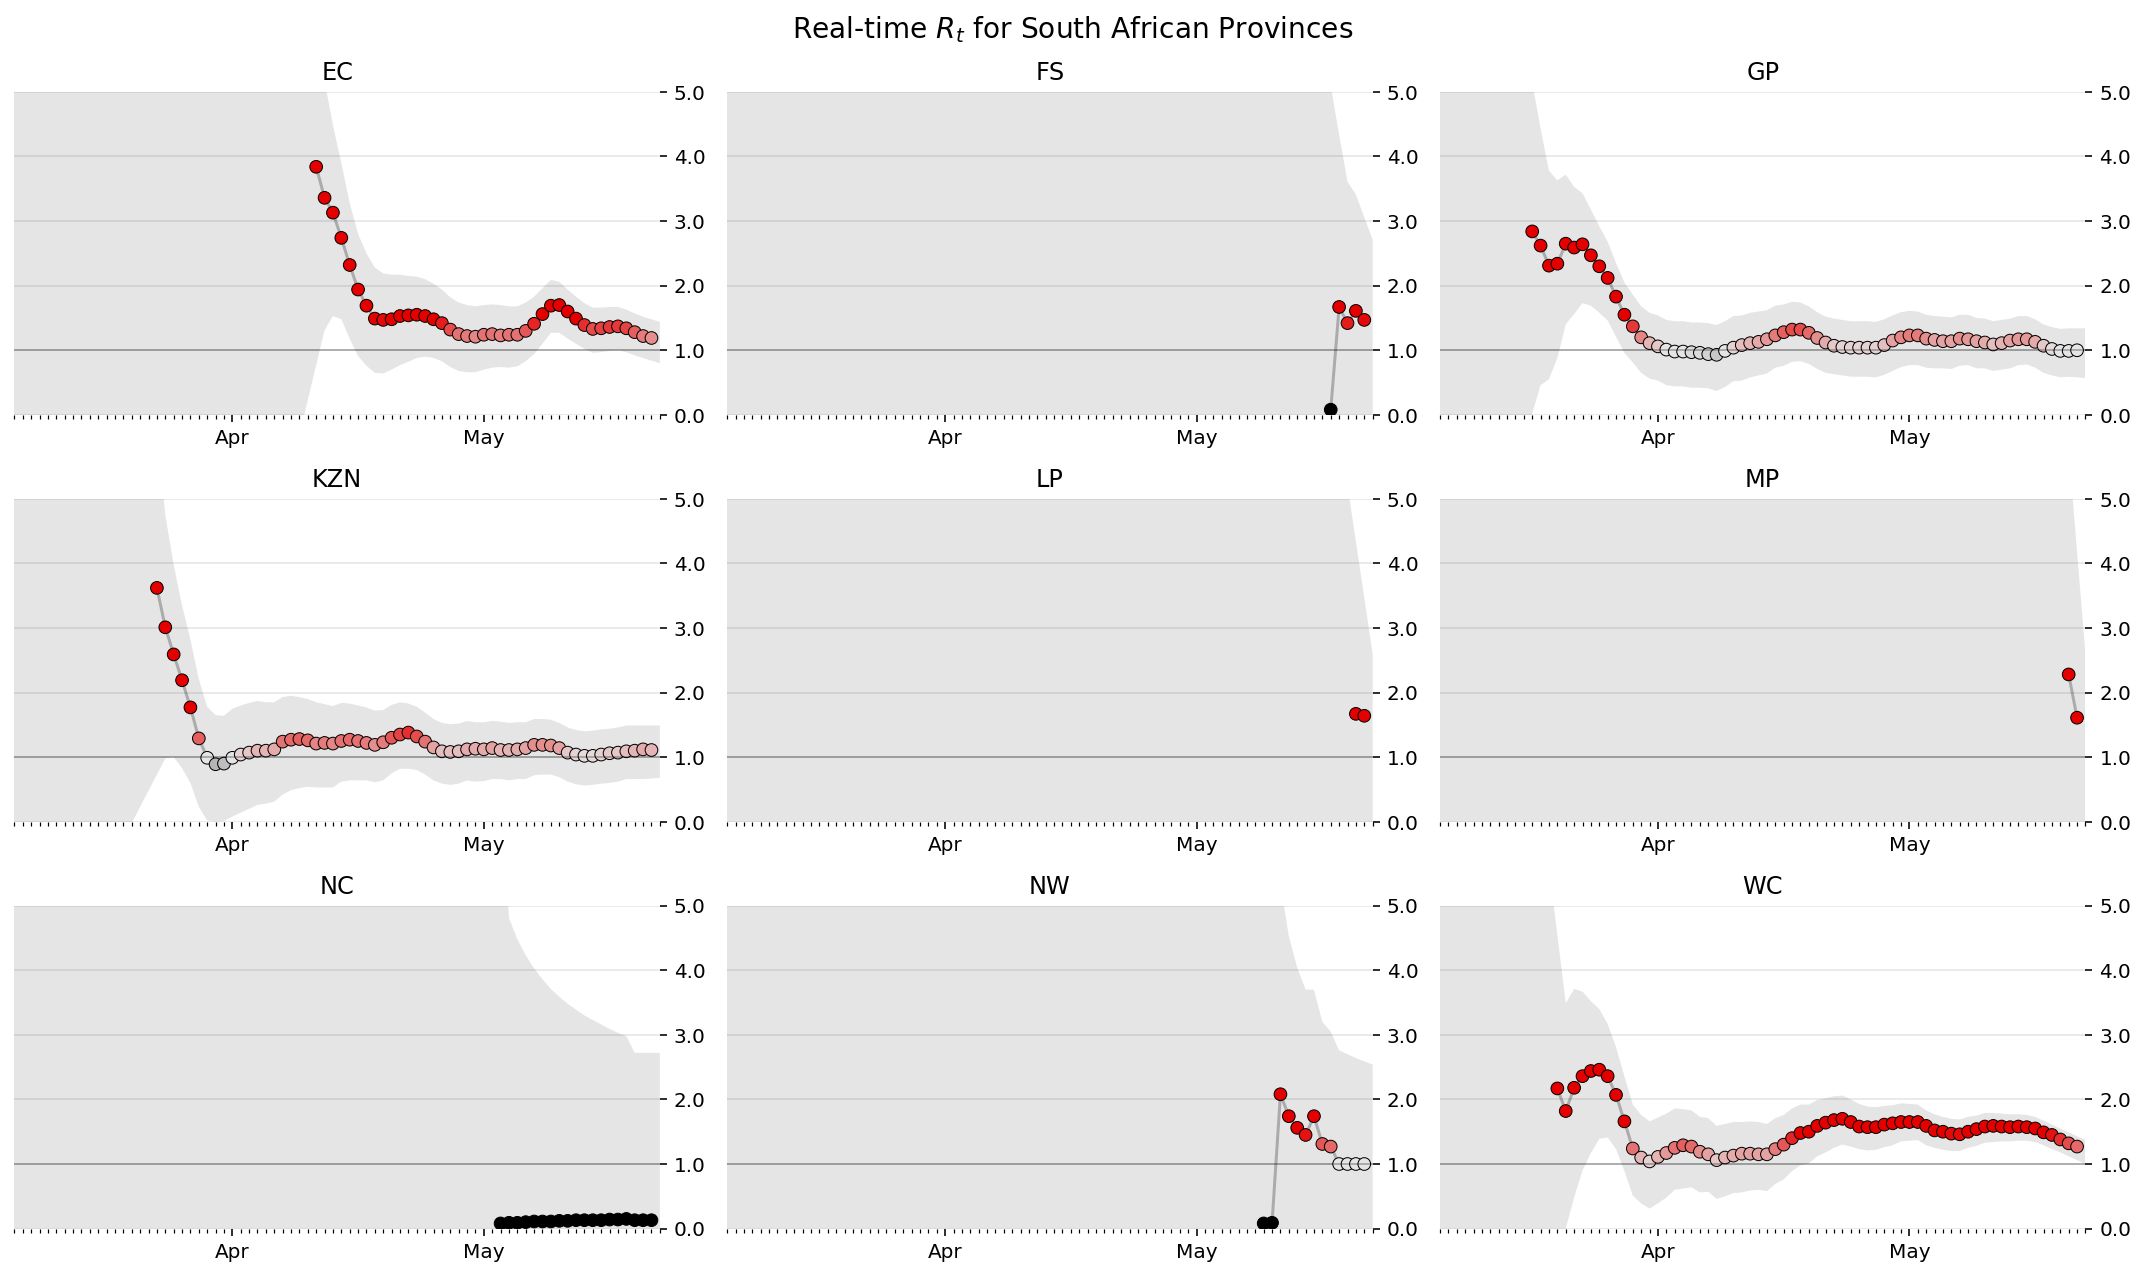

In [179]:
ncols = 3
nrows = int(np.ceil(len(results) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*3))

for i, (state_name, result) in enumerate(final_results.groupby('state')):
    plot_rt(result, axes.flat[i], state_name)
    
fig.tight_layout()
fig.suptitle(f'Real-time $R_t$ for South African Provinces', fontsize=14)
fig.subplots_adjust(top=0.92)
fig.set_facecolor('w')

### Standings

In [180]:
# ZA: South Arica lockdown level data as of 2020/05/03
no_lockdown = [

]
partial_lockdown = [

]
# add items as required -> 'Western Cape','WC',

FULL_COLOR = [.7,.7,.7]
NONE_COLOR = [179/255,35/255,14/255]
PARTIAL_COLOR = [.5,.5,.5]
ERROR_BAR_COLOR = [.3,.3,.3]

In [181]:
# ZA: df slighty different to US
mr = final_results.groupby(level=0)[['ML', 'High_90', 'Low_90']].last()
mr

,ML,High_90,Low_90
state,,,
EC,1.19,1.48,0.84
FS,1.47,3.06,0.00
GP,1.00,1.34,0.58
KZN,1.11,1.49,0.67
LP,1.64,3.47,0.00
MP,1.61,4.18,0.00
NC,0.13,2.72,0.00
NW,1.00,2.59,0.00
WC,1.27,1.43,1.06


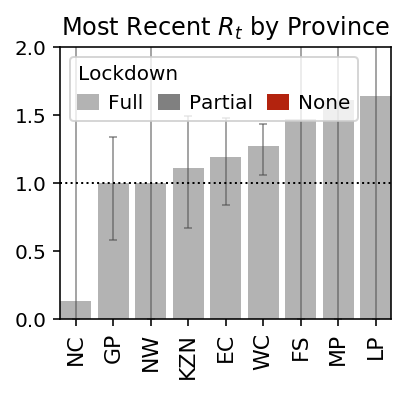

In [182]:
def plot_standings(mr, figsize=None, title='Most Recent $R_t$ by Province'):
    if not figsize:
        figsize = ((15.9/50)*len(mr)+.1,2.5)
        
    fig, ax = plt.subplots(figsize=figsize)

    ax.set_title(title)
    err = mr[['Low_90', 'High_90']].sub(mr['ML'], axis=0).abs()
    bars = ax.bar(mr.index,
                  mr['ML'],
                  width=.825,
                  color=FULL_COLOR,
                  ecolor=ERROR_BAR_COLOR,
                  capsize=2,
                  error_kw={'alpha':.5, 'lw':1},
                  yerr=err.values.T)

    for bar, state_name in zip(bars, mr.index):
        if state_name in no_lockdown:
            bar.set_color(NONE_COLOR)
        if state_name in partial_lockdown:
            bar.set_color(PARTIAL_COLOR)

    labels = mr.index.to_series().replace({'District of Columbia':'DC'})
    ax.set_xticklabels(labels, rotation=90, fontsize=11)
    ax.margins(0)
    ax.set_ylim(0,2.)
    ax.axhline(1.0, linestyle=':', color='k', lw=1)

    leg = ax.legend(handles=[
                        Patch(label='Full', color=FULL_COLOR),
                        Patch(label='Partial', color=PARTIAL_COLOR),
                        Patch(label='None', color=NONE_COLOR)
                    ],
                    title='Lockdown',
                    ncol=3,
                    loc='upper left',
                    columnspacing=.75,
                    handletextpad=.5,
                    handlelength=1)

    leg._legend_box.align = "left"
    fig.set_facecolor('w')
    return fig, ax

mr.sort_values('ML', inplace=True)
plot_standings(mr);

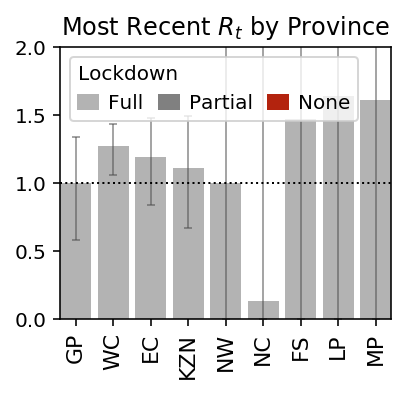

In [183]:
mr.sort_values('High_90', inplace=True)
plot_standings(mr);

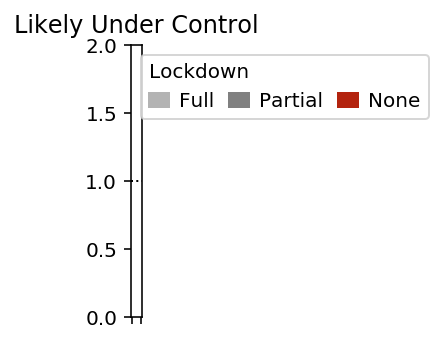

In [184]:
show = mr[mr.High_90.le(1)].sort_values('ML')
fig, ax = plot_standings(show, title='Likely Under Control');

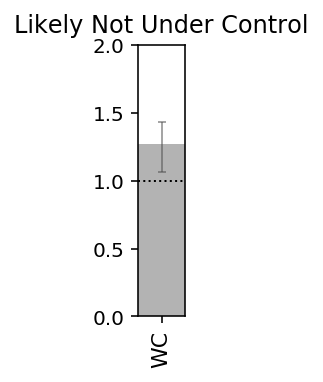

In [185]:
show = mr[mr.Low_90.ge(1.0)].sort_values('Low_90')
fig, ax = plot_standings(show, title='Likely Not Under Control');
ax.get_legend().remove()